In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leo excel Marcas1-10Unificado.xlsx
df = pd.read_excel('Marcas1-10Unificado.xlsx', sheet_name='Sheet1')

In [3]:
# Me quedo solo con años 2022 y 2023 pues son los años que tienen data completa
df = df[(df['anio_entero'] == 2022) | (df['anio_entero'] == 2023)]

In [4]:
# Quito de la columna 62 en adelante. Categorías sin sentido
df = df.iloc[:, :62]

# Ventas totales de marca

In [5]:
# Creo un dataframe que contenga marca y ventas
df_ventas = df[['marca', 'ventas']]

# Agrupo por marca y sumo las ventas
df_ventas = df_ventas.groupby('marca').sum()

# Hago reset_index para que me quede la marca y las ventas como columna
df_ventas = df_ventas.reset_index()

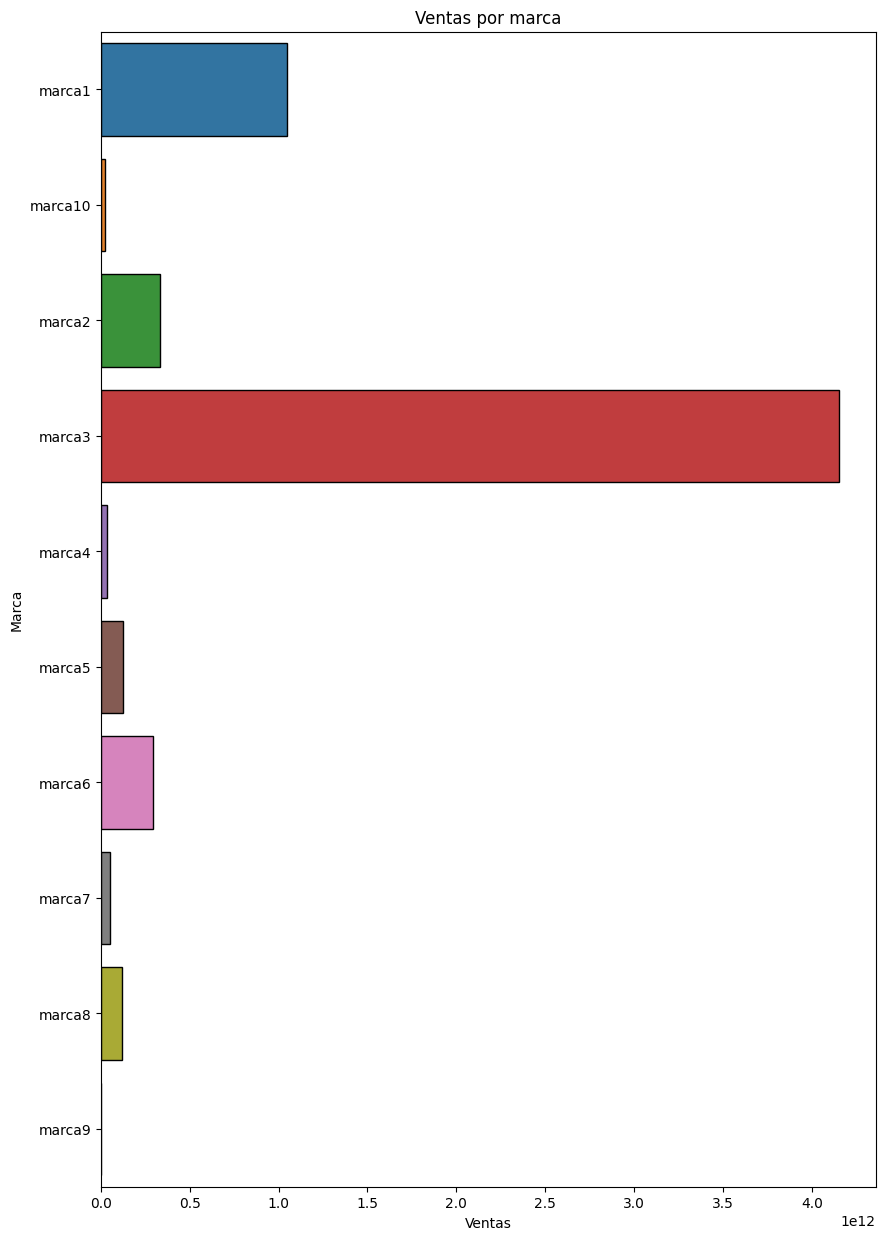

In [72]:
# Gráfico de barras con seaborn
plt.figure(figsize=(10, 15))
sns.barplot(x='ventas', y='marca', data=df_ventas, orient='h', linewidth=1, edgecolor='black')

plt.xlabel('Ventas')
plt.ylabel('Marca')
plt.title('Ventas por marca')
plt.show()

# Ventas de marca por año

In [7]:
# Creo un dataframe que contenga marca, anio_entero y ventas
df_anio = df[['marca', 'anio_entero', 'ventas']]

# Agrupo por marca y anio_entero y sumo las ventas
df_anio = df_anio.groupby(['marca', 'anio_entero']).sum()

# Hago reset_index para que me quede marca y anio_entero como columnas
df_anio = df_anio.reset_index()

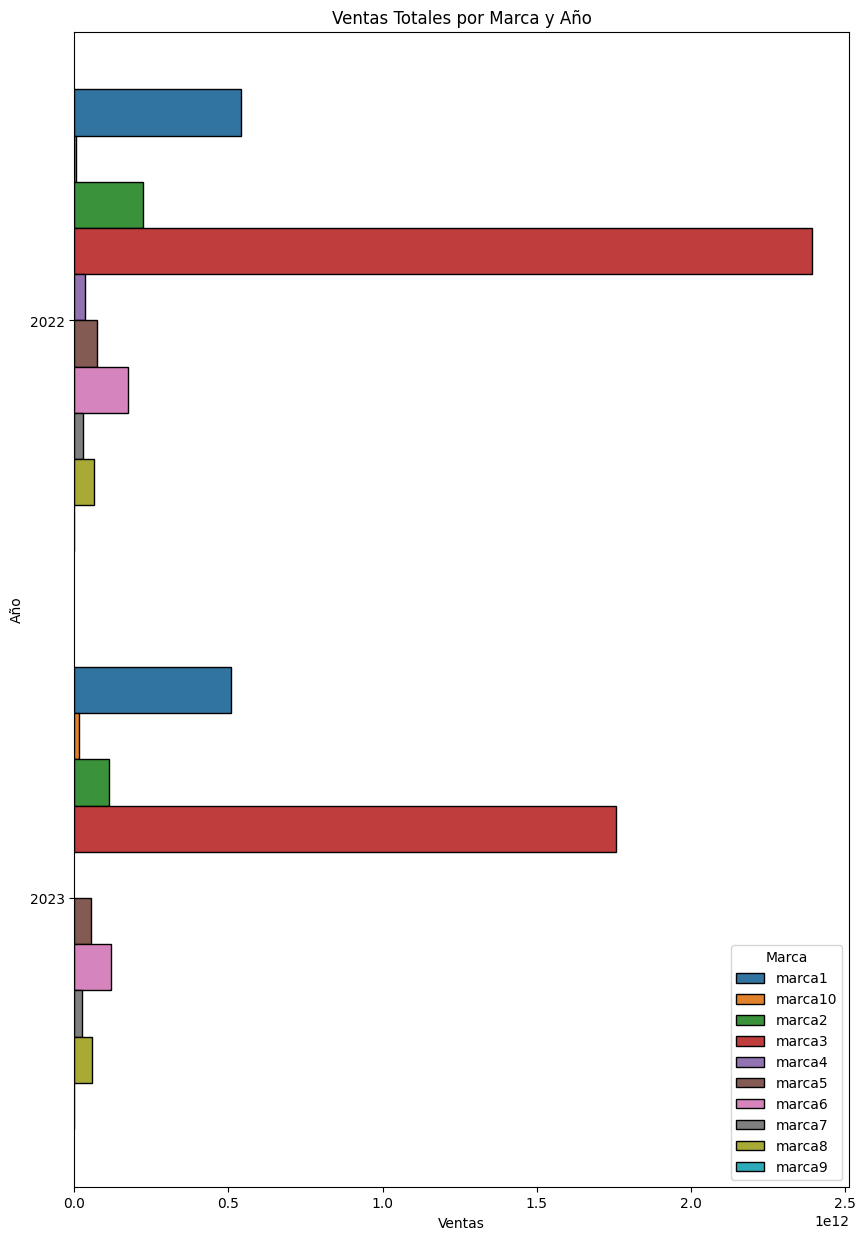

In [71]:
# Gráfico de barras con seaborn
plt.figure(figsize=(10, 15))
sns.barplot(x='ventas', y='anio_entero', hue='marca', data=df_anio, orient='h',linewidth=1, edgecolor='black')

plt.xlabel('Ventas')
plt.ylabel('Año')
plt.title('Ventas Totales por Marca y Año')
plt.legend(title='Marca')
plt.show()

# Ventas de tienda por año

In [65]:
# Creo un dataframe que contenga marca, anio_entero y ventas
df_anio_tienda = df[['tienda', 'anio_entero', 'ventas']]

# Agrupo por marca y anio_entero y sumo las ventas
df_anio_tienda = df_anio_tienda.groupby(['tienda', 'anio_entero']).sum()

# Hago reset_index para que me quede marca y anio_entero como columnas
df_anio_tienda = df_anio_tienda.reset_index()

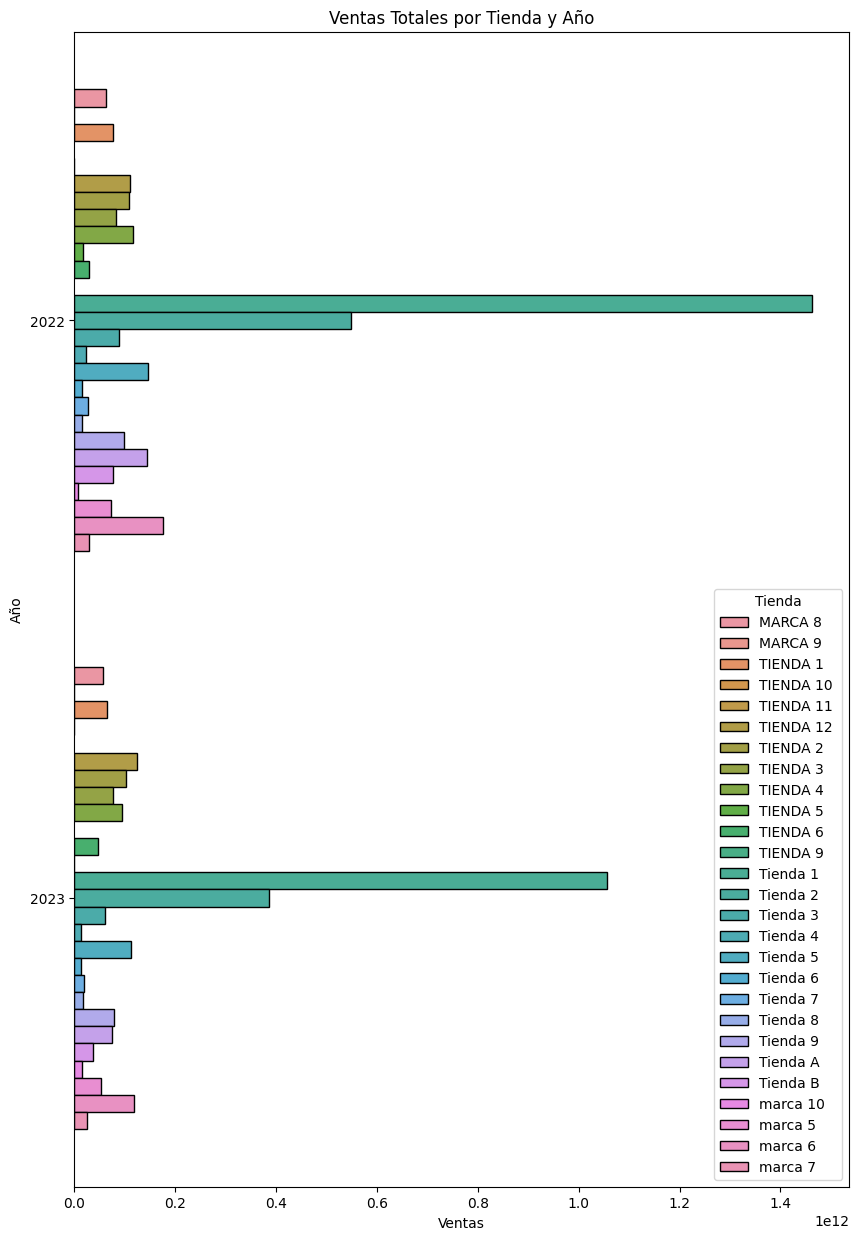

In [70]:
# Gráfico de barras con seaborn
plt.figure(figsize=(10, 15))
# Agregarle separación entre barras
sns.barplot(x='ventas', y='anio_entero', hue='tienda', data=df_anio_tienda, orient='h', linewidth=1, edgecolor='black')

plt.xlabel('Ventas')
plt.ylabel('Año')
plt.title('Ventas Totales por Tienda y Año')
plt.legend(title='Tienda')
plt.show()

# Ventas por marca por categoria

In [24]:
# Copia del dataframe original
df_ventas_cat = df.copy()

# Elimino las columnas precio_bruto_total, impuesto_total, descuento_total, ventas_sin_iva, tipo_de_tienda
df_ventas_cat = df_ventas_cat.drop(['precio_bruto_total', 'impuesto_total', 'descuento_total', 'ventas_sin_iva', 'tipo_de_tienda'], axis=1)

# Solo me quedo con las marcas y las categorias respectivas
""" Me quedo con 'marca', 'accesorios', 'comida',
       'cuidado personal', 'golosinas', 'juegos y juguetes', 'libros', 'lujo',
       'miscelanea', 'perfumería', 'souvenirs', 'tecnologia',
       'textiles de regalo', 'vicios', 'alimentos y bebidas retail',
       'artesanias', 'articulos de viaje', 'cafe', 'complementos cafe',
       'joyeria', 'productos de papel', 'reposteria dulce',
       'revistas y periodicos', 'textiles de playa', 'descripcion',
       'accesorios de lujo femenino', 'accesorios de lujo masculino',
       'bienestar femenino', 'bienestar masculino', 'bienestar unisex',
       'bolsos femenino', 'bolsos masculino', 'calzado femenino',
       'calzado masculino', 'cinturones femenino', 'cinturones masculino',
       'marroquinería femenino', 'marroquinería masculino',
       'prendas de vestir femenino', 'prendas de vestir masculino',
       'productos comerciali unisex', 'sin asignar sin asignar',
       'travel & business femenino', 'travel & business masculino'
"""
df_ventas_cat = df_ventas_cat[['marca', 'accesorios', 'comida', 'cuidado personal', 
                               'golosinas', 'juegos y juguetes', 'libros', 
                               'lujo', 'miscelanea', 'perfumería', 'souvenirs', 
                               'tecnologia', 'textiles de regalo', 'vicios', 
                               'alimentos y bebidas retail', 'artesanias', 
                               'articulos de viaje', 'cafe', 'complementos cafe', 
                               'joyeria', 'productos de papel', 'reposteria dulce', 
                               'revistas y periodicos', 'textiles de playa', 'descripcion', 
                               'accesorios de lujo femenino', 'accesorios de lujo masculino', 'bienestar femenino', 
                               'bienestar masculino', 'bienestar unisex', 'bolsos femenino', 
                               'bolsos masculino', 'calzado femenino', 'calzado masculino', 
                               'cinturones femenino', 'cinturones masculino', 'marroquinería femenino', 
                               'marroquinería masculino', 'prendas de vestir femenino', 'prendas de vestir masculino', 
                               'productos comerciali unisex', 'sin asignar sin asignar', 'travel & business femenino', 
                               'travel & business masculino']]

# Las marcas de mi interés son 3, 4, 6 y 10 pues son las que tienen la información que requiero de las categorías
df_ventas_cat = df_ventas_cat[(df_ventas_cat['marca'] == "marca3") | (df_ventas_cat['marca'] == "marca4") | (df_ventas_cat['marca'] == "marca6") | (df_ventas_cat['marca'] == "marca10")]

# Agrupo por marca y las demás columnas hago una sumatoria
df_ventas_cat = df_ventas_cat.groupby('marca').sum(numeric_only=True)

# Hago reset_index para que me quede marca como columna
df_ventas_cat = df_ventas_cat.reset_index()

In [27]:
df_ventas_cat.head()

,marca,accesorios,comida,cuidado personal,golosinas,juegos y juguetes,libros,lujo,miscelanea,perfumería,...,cinturones femenino,cinturones masculino,marroquinería femenino,marroquinería masculino,prendas de vestir femenino,prendas de vestir masculino,productos comerciali unisex,sin asignar sin asignar,travel & business femenino,travel & business masculino
0,marca10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,marca3,1756,9850,10014,1644,12377,14522,4043,158,38420,...,0,0,0,0,0,0,0,0,0,0
2,marca4,0,9607,15725,283393,5441,6849,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,marca6,0,0,0,0,0,0,0,0,0,...,2345,3445,3663,4087,3050,2879,1233,15,478,586


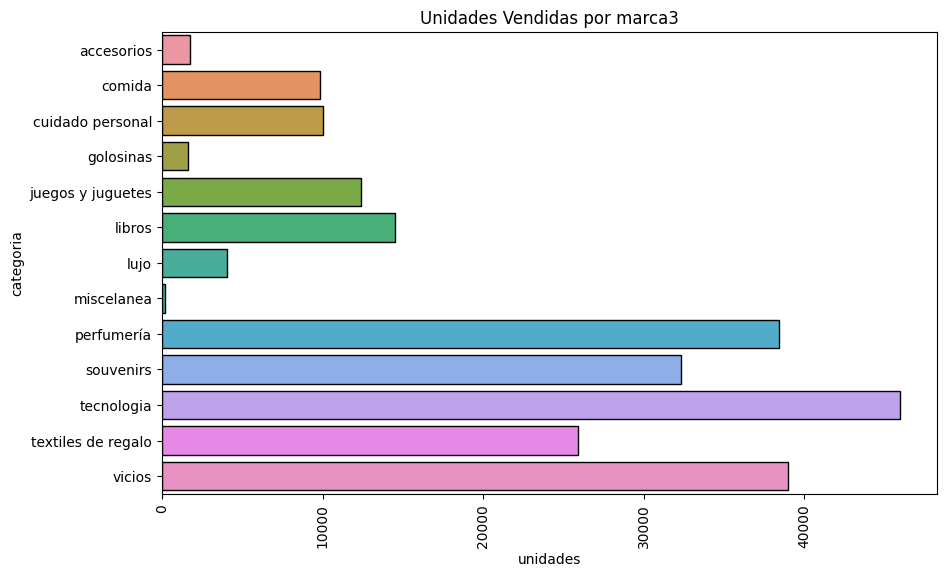

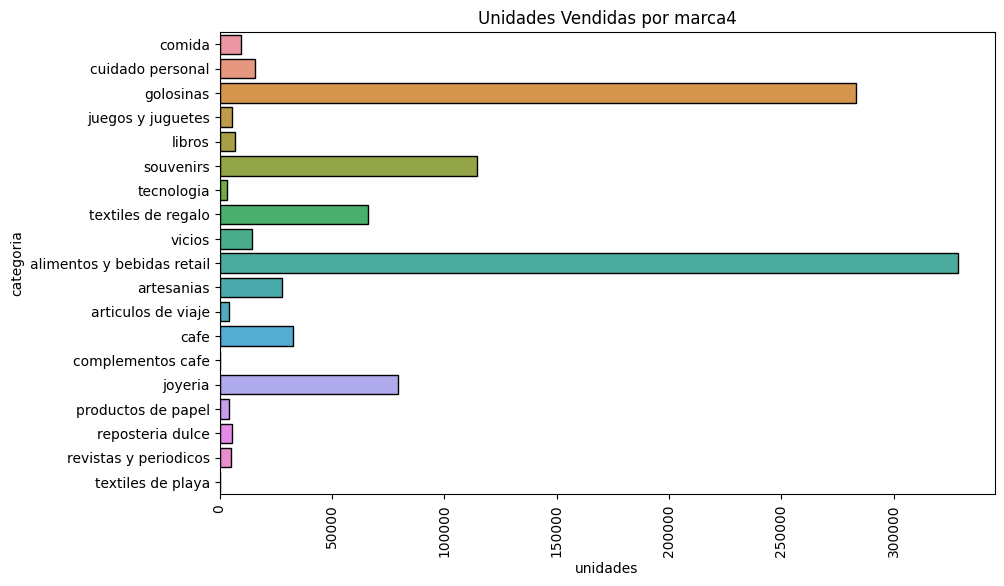

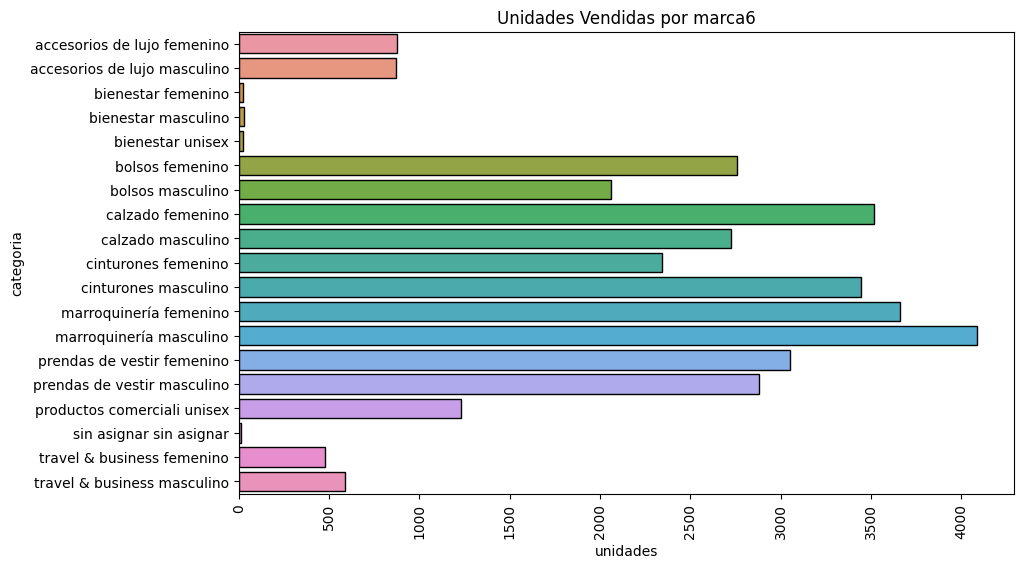

In [73]:
# Por cada marca hago una gráfica respectivas con las unidades vendidas de las diferentes categorías. Que tengan valores mayores a 0
for marca in df_ventas_cat['marca']:
    df_marca = df_ventas_cat[df_ventas_cat['marca'] == marca].drop(columns=['marca'])
    df_marca = df_marca.melt(var_name='categoria', value_name='unidades')
    df_marca = df_marca[df_marca['unidades'] > 0]  # Filtrar categorías con más de 0 unidades
    
    if not df_marca.empty:  # Comprobar si el DataFrame filtrado está vacío
        plt.figure(figsize=(10, 6))
        sns.barplot(x='unidades', y='categoria', data=df_marca, orient='h',linewidth=1, edgecolor='black')
        plt.title(f'Unidades Vendidas por {marca}')
        plt.xticks(rotation=90)
        plt.show()

# Ventas de marca por categoría y año

In [51]:
# Copia del dataframe original
df_ventas_cat_anio = df.copy()

# Elimino las columnas precio_bruto_total, impuesto_total, descuento_total, ventas_sin_iva, tipo_de_tienda
df_ventas_cat_anio = df_ventas_cat_anio.drop(['precio_bruto_total', 'impuesto_total', 'descuento_total', 'ventas_sin_iva', 'tipo_de_tienda'], axis=1)

# Solo me quedo con las marcas y las categorias respectivas
""" Me quedo con 'marca', 'anio_entero', 'accesorios', 'comida',
       'cuidado personal', 'golosinas', 'juegos y juguetes', 'libros', 'lujo',
       'miscelanea', 'perfumería', 'souvenirs', 'tecnologia',
       'textiles de regalo', 'vicios', 'alimentos y bebidas retail',
       'artesanias', 'articulos de viaje', 'cafe', 'complementos cafe',
       'joyeria', 'productos de papel', 'reposteria dulce',
       'revistas y periodicos', 'textiles de playa', 'descripcion',
       'accesorios de lujo femenino', 'accesorios de lujo masculino',
       'bienestar femenino', 'bienestar masculino', 'bienestar unisex',
       'bolsos femenino', 'bolsos masculino', 'calzado femenino',
       'calzado masculino', 'cinturones femenino', 'cinturones masculino',
       'marroquinería femenino', 'marroquinería masculino',
       'prendas de vestir femenino', 'prendas de vestir masculino',
       'productos comerciali unisex', 'sin asignar sin asignar',
       'travel & business femenino', 'travel & business masculino'
"""
df_ventas_cat_anio = df_ventas_cat_anio[['marca', 'anio_entero', 'accesorios', 'comida', 'cuidado personal', 
                               'golosinas', 'juegos y juguetes', 'libros', 
                               'lujo', 'miscelanea', 'perfumería', 'souvenirs', 
                               'tecnologia', 'textiles de regalo', 'vicios', 
                               'alimentos y bebidas retail', 'artesanias', 
                               'articulos de viaje', 'cafe', 'complementos cafe', 
                               'joyeria', 'productos de papel', 'reposteria dulce', 
                               'revistas y periodicos', 'textiles de playa', 'descripcion', 
                               'accesorios de lujo femenino', 'accesorios de lujo masculino', 'bienestar femenino', 
                               'bienestar masculino', 'bienestar unisex', 'bolsos femenino', 
                               'bolsos masculino', 'calzado femenino', 'calzado masculino', 
                               'cinturones femenino', 'cinturones masculino', 'marroquinería femenino', 
                               'marroquinería masculino', 'prendas de vestir femenino', 'prendas de vestir masculino', 
                               'productos comerciali unisex', 'sin asignar sin asignar', 'travel & business femenino', 
                               'travel & business masculino']]

# Las marcas de mi interés son 3, 4 y 6 pues son las que tienen la información que requiero de las categorías
df_ventas_cat_anio = df_ventas_cat_anio[(df_ventas_cat_anio['marca'] == "marca3") | (df_ventas_cat_anio['marca'] == "marca4") | (df_ventas_cat_anio['marca'] == "marca6")]

# Agrupo por marca y por año y las demás columnas hago una sumatoria
df_ventas_cat_anio = df_ventas_cat_anio.groupby(['marca', 'anio_entero']).sum(numeric_only=True)

# Hago reset_index para que me quede marca como columna
df_ventas_cat_anio = df_ventas_cat_anio.reset_index()

In [52]:
df_ventas_cat_anio

,marca,anio_entero,accesorios,comida,cuidado personal,golosinas,juegos y juguetes,libros,lujo,miscelanea,...,cinturones femenino,cinturones masculino,marroquinería femenino,marroquinería masculino,prendas de vestir femenino,prendas de vestir masculino,productos comerciali unisex,sin asignar sin asignar,travel & business femenino,travel & business masculino
0,marca3,2022,1193,5960,6296,1644,7437,8511,2618,45,...,0,0,0,0,0,0,0,0,0,0
1,marca3,2023,563,3890,3718,0,4940,6011,1425,113,...,0,0,0,0,0,0,0,0,0,0
2,marca4,2022,0,9607,15725,283393,5441,6849,0,0,...,0,0,0,0,0,0,0,0,0,0
3,marca6,2022,0,0,0,0,0,0,0,0,...,1434,2170,2278,2604,1885,1825,678,15,317,346
4,marca6,2023,0,0,0,0,0,0,0,0,...,911,1275,1385,1483,1165,1054,555,0,161,240


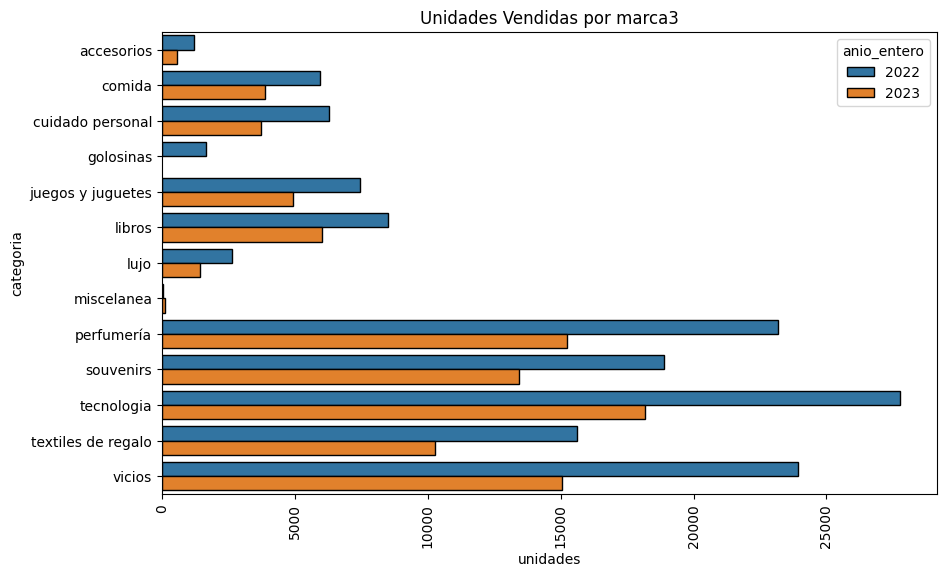

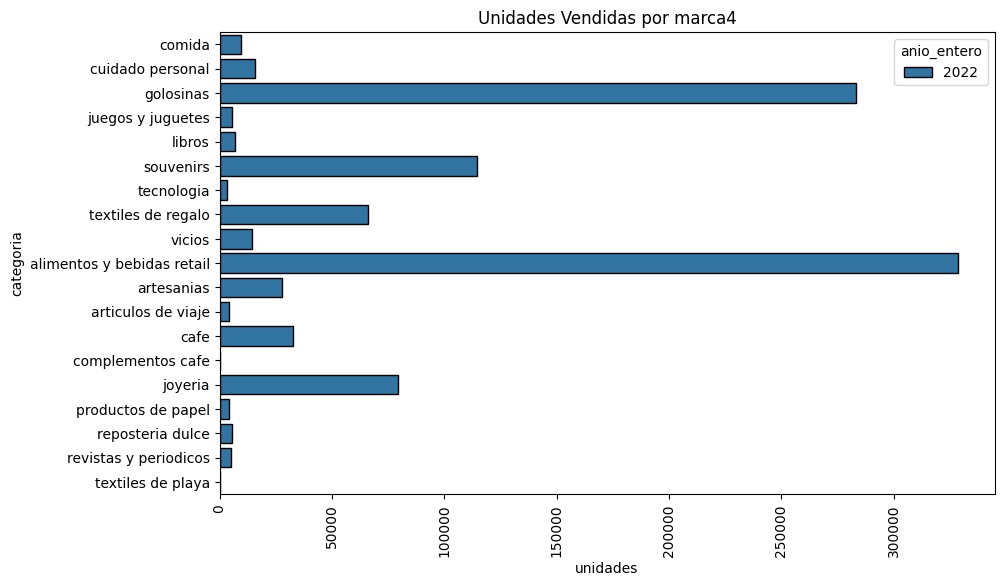

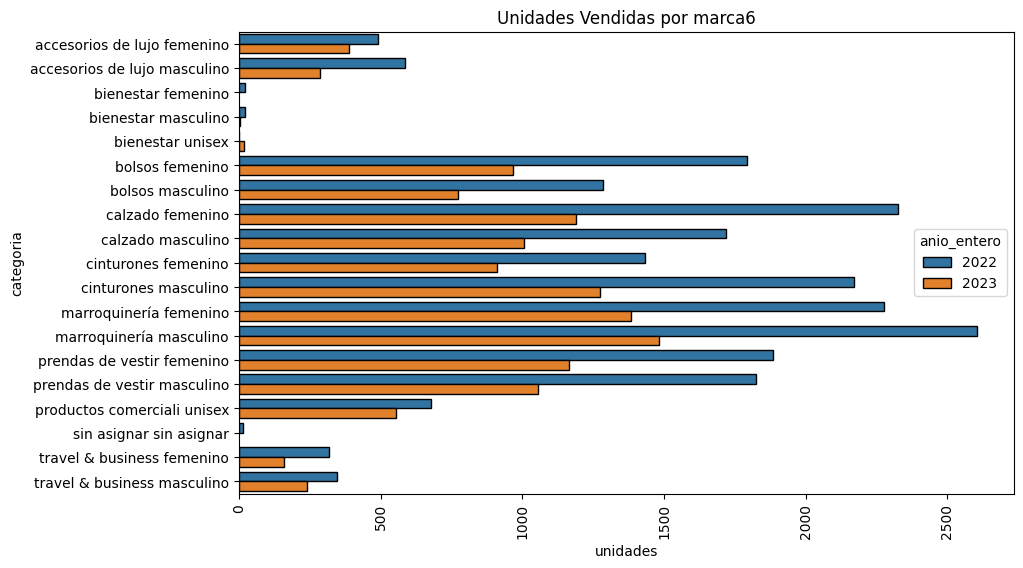

In [74]:
# Por cada marca y año hago una gráfica respectivas con las unidades vendidas de las diferentes categorías. Que tengan valores mayores a 0. 
# Por cada marca se mostrará una sola gráfica que contenga años y categorías
for marca in df_ventas_cat_anio['marca'].unique():
    df_marca = df_ventas_cat_anio[df_ventas_cat_anio['marca'] == marca].drop(columns=['marca'])
    # Con melt hago que las columnas de categorías se conviertan en una sola columna y los valores de las categorías en otra columna
    df_marca = df_marca.melt(id_vars=['anio_entero'], var_name='categoria', value_name='unidades')
    df_marca = df_marca[df_marca['unidades'] > 0]  # Filtrar categorías con más de 0 unidades
    
    if not df_marca.empty:  # Comprobar si el DataFrame filtrado está vacío
        plt.figure(figsize=(10, 6))
        sns.barplot(x='unidades', y='categoria', hue='anio_entero', data=df_marca, orient='h', linewidth=1, edgecolor='black')
        plt.title(f'Unidades Vendidas por {marca}')
        plt.xticks(rotation=90)
        plt.show()

# Ventas por semana por año

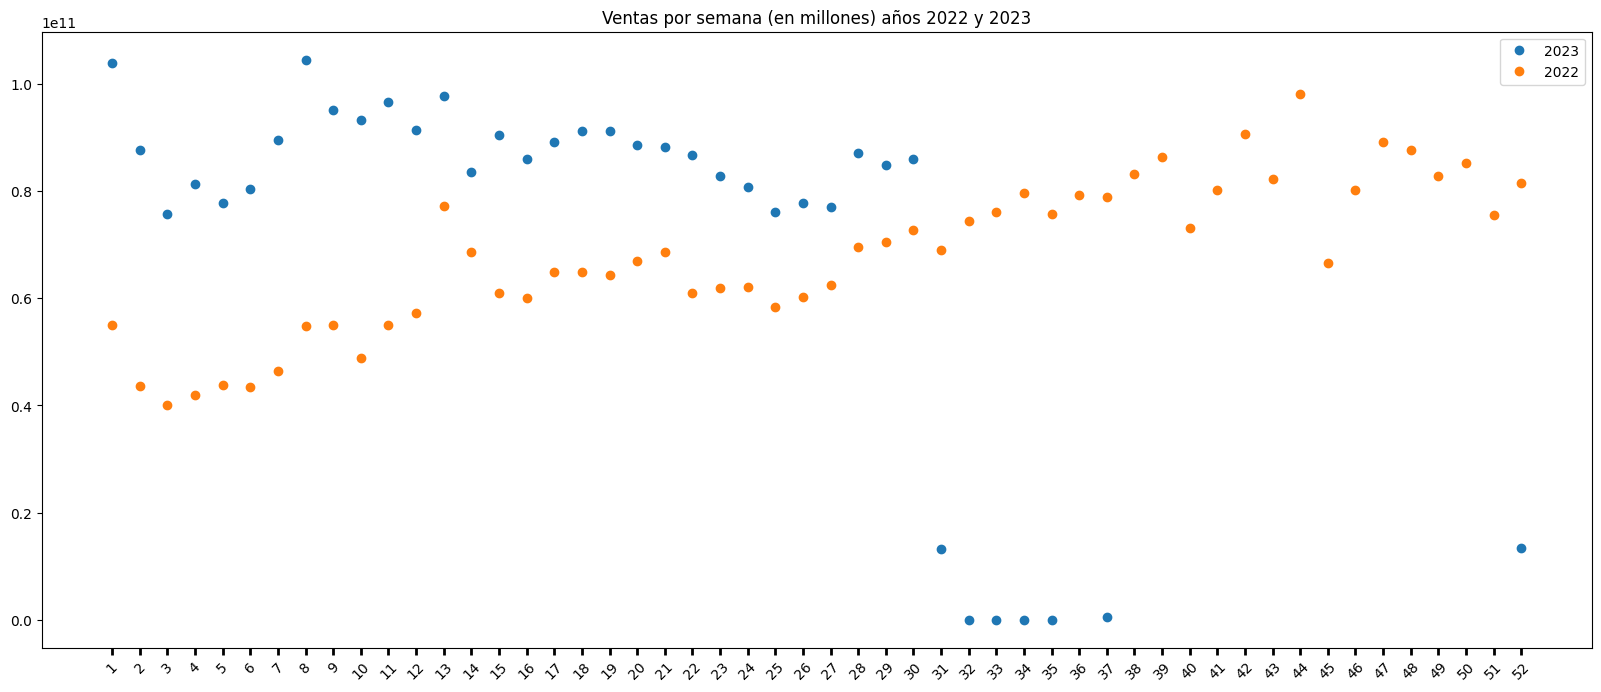

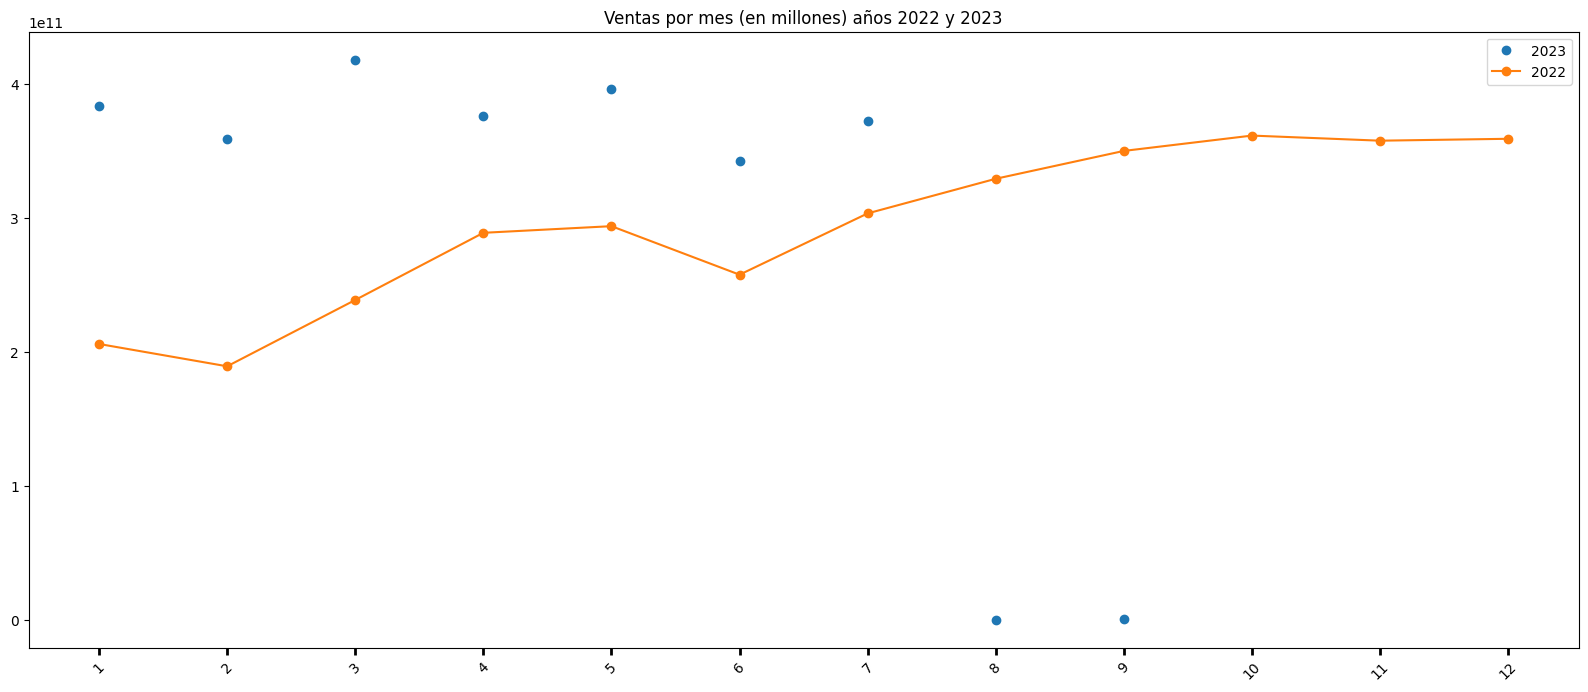

In [61]:
# Agrupar por semana del año y sumas las ventas

plt.figure(figsize=(20, 8))
plt.plot(df.loc[df["anio_entero"]==2023].groupby(by=["semana"])["ventas"].sum(),"o",label="2023")
plt.plot(df.loc[df["anio_entero"]==2022].groupby(by=["semana"])["ventas"].sum(),"o",label="2022")
plt.tick_params(axis="x", length=5, width=2, labelrotation=45.0)
plt.xticks(range(1, 53))
plt.legend(loc='best')
plt.title("Ventas por semana (en millones) años 2022 y 2023")
plt.show()
plt.figure(figsize=(20, 8))
plt.plot(df.loc[df["anio_entero"]==2023].groupby(by=["mes_entero"])["ventas"].sum(),"o",label="2023")
plt.plot(df.loc[df["anio_entero"]==2022].groupby(by=["mes_entero"])["ventas"].sum(),"o-",label="2022")
plt.tick_params(axis="x", length=5, width=2, labelrotation=45.0)
plt.xticks(range(1, 13))
plt.legend(loc='best')
plt.title("Ventas por mes (en millones) años 2022 y 2023")
plt.show()